In [28]:
import mllogdpcommon
smilelogd, descriptors, yval, setids = mllogdpcommon.import_descriptor ("descriptor_titolato_out13.csv", 1)


In [29]:
smilelogd, X, Y, setids = mllogdpcommon.import_descriptor ("descriptor_titolato_out13.csv", 1)

print(X.shape, Y.shape)

(1078, 1879) (1078,)


In [30]:
ytr = []
yte = []
xtr = []
xte = []
type(setids)
for idx, smile in enumerate(setids):
    #print(("%5d ")%(idx), "\"%s\""%(setids[smile]), "%10.7f"%Y[idx], X[idx,:])
    if setids[smile] == " Te ":
        yte.append(Y[idx])
        xte.append(X[idx,:])
    elif setids[smile] == " Tr ":
        ytr.append(Y[idx])
        xtr.append(X[idx,:])
    else:
        print("Error ", setids[smile])
print(len(ytr))
print(len(xtr))

print(len(xte))
print(len(yte))



865
865
213
213


   1 1.87513100 0.46408395
   2 1.46879385 0.58021589
   3 1.32194448 0.62218573
   4 1.21643614 0.65234021
   5 1.21652130 0.65231587
   6 1.21332723 0.65322874
   7 1.21297459 0.65332953
   8 1.21161278 0.65371874
   9 1.21296449 0.65333242
  10 1.21329547 0.65323782
  11 1.21442555 0.65291484
  12 1.21437165 0.65293025
  13 1.21422757 0.65297143
  14 1.21431839 0.65294547
  15 1.21432903 0.65294243
  16 1.21433783 0.65293991
  17 1.21433305 0.65294128
  18 1.21433814 0.65293982
  19 1.21434044 0.65293917
Suggested number of components tr:  8


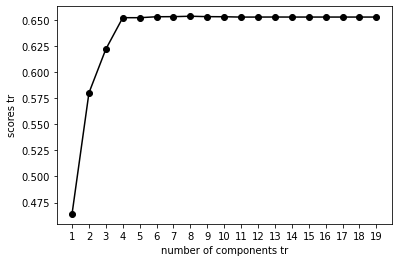

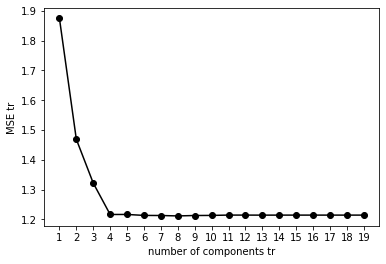

In [31]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

trscores = []
trmses = []
trncomps = []
for trncomp in range(1,20):
    pls = PLSRegression(trncomp)
    pls.fit(xtr, ytr)
    
    y_cv = cross_val_predict(pls, xtr, ytr, cv=10)
    
    trscore = r2_score(ytr, y_cv)
    trmse = mean_squared_error(ytr, y_cv)
    
    trscores.append(trscore)
    trmses.append(trmse)
    trncomps.append(trncomp)
    print("%4d %10.8f %10.8f"%(trncomp, trmse, trscore))
    
msetrmin = np.argmin(trmses)
print("Suggested number of components tr: ", msetrmin+1)
    
plt.plot(trncomps, trscores, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('scores tr')
plt.xticks(trncomps)
plt.show()

plt.plot(trncomps, trmses, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('MSE tr')
plt.xticks(trncomps)
plt.show()


In [32]:
# il numero suggerito di componenti principali( usando cv=10 ) è : 8
# il numero occhiometricamente ottenuto di componenti principali (usando cv=10) è : 4


In [33]:
# costruzione del modello usando 4 componenti seguendo l'intuizione basata sul grafico 
ncomp = 4

pls_4 = PLSRegression(ncomp)
pls_4.fit(xtr, ytr)
    
y_cv4 = cross_val_predict(pls_4, xtr, ytr, cv=10)
    
score4 = r2_score(ytr, y_cv4)
mse4 = mean_squared_error(ytr, y_cv4)    

print("comp: %4d MSE: %10.8f score: %10.8f"%(ncomp, mse4, score4))

comp:    4 MSE: 1.21643614 score: 0.65234021


In [34]:
# costruzione del modello usando il numero di componenti suggerito : 8 
ncomp8 = 8

pls_8 = PLSRegression(ncomp8)
pls_8.fit(xtr, ytr)
    
y_cv8 = cross_val_predict(pls_8, xtr, ytr, cv=10)
    
score8 = r2_score(ytr, y_cv8)
mse8 = mean_squared_error(ytr, y_cv8)    

print("comp: %4d MSE: %10.8f score: %10.8f"%(ncomp8, mse8, score8))

comp:    8 MSE: 1.21161278 score: 0.65371874


-0.7400000  0.7472426 -1.4872426  0.8060509 -1.5460509
-0.6800000 -0.0977943 -0.5822057  0.0043230 -0.6843230
-0.5000000  0.8161311 -1.3161311  0.8019107 -1.3019107
-0.3900000 -0.2523867 -0.1376133 -0.2709288 -0.1190712
-0.3400000 -0.2866249 -0.0533751 -0.1951396 -0.1448604
-0.2100000  0.0226675 -0.2326675  0.0336311 -0.2436311
-0.1900000 -0.0536949 -0.1363051  0.0450882 -0.2350882
-0.1300000  1.2608916 -1.3908916  1.3669495 -1.4969495
-0.0400000  1.2662220 -1.3062220  1.1885111 -1.2285111
 0.0500000  2.4162636 -2.3662636  2.5826170 -2.5326170
 0.2000000  1.8928967 -1.6928967  1.8491412 -1.6491412
 0.2100000 -0.1178443  0.3278443 -0.0953531  0.3053531
 0.3000000  0.3766329 -0.0766329  0.4816353 -0.1816353
 0.4000000  0.7303638 -0.3303638  0.5382043 -0.1382043
 0.6400000  1.5262987 -0.8862987  1.4494391 -0.8094391
 0.6930000  0.8283400 -0.1353400  0.7654404 -0.0724404
 0.9800000  1.4116106 -0.4316106  1.4104977 -0.4304977
 1.1000000  2.0619403 -0.9619403  1.8734904 -0.7734904
 1.1400000

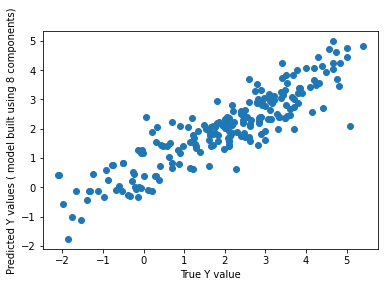

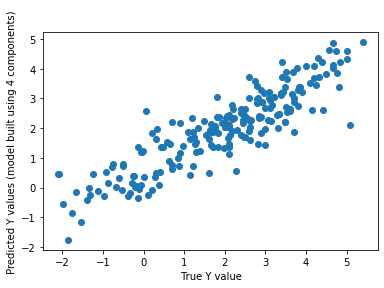

In [35]:
Y_pred8 = pls_8.predict(xte)
Y_pred4 = pls_4.predict(xte)

mse_pred8 = mean_squared_error(yte, Y_pred8 )
mse_pred4 = mean_squared_error(yte, Y_pred4 )
score_pred8 = r2_score(yte, Y_pred8)
score_pred4 = r2_score(yte, Y_pred4)
RMSE_PRED8 = mean_squared_error(yte, Y_pred8, squared = False)
RMSE_PRED4 = mean_squared_error(yte, Y_pred4, squared = False)
# print("%10.7f %10.7f "%(RMSE_PRED4, RMSE_PRED8))

diff4 = []
diff8 = []

for idx, val in enumerate(yte):
    diff4.append(val-Y_pred4[idx])
    diff8.append(val-Y_pred8[idx])
    print("%10.7f %10.7f %10.7f %10.7f %10.7f"%(\
                                val, Y_pred8[idx], diff8[-1], \
                            Y_pred4[idx], diff4[-1]))
    
print("MSE 8 comp: ", mse_pred8) 
print("MSE 4 comp: ", mse_pred4)
print("score 8 comp:", score_pred8)
print("score 4 comp:", score_pred4)

plt.xlabel("True Y value")
plt.ylabel("Predicted Y values ( model built using 8 components)")

plt.scatter(yte, Y_pred8)

plt.show()

plt.xlabel(" True Y value")
plt.ylabel(" Predicted Y values (model built using 4 components) ")

plt.scatter(yte, Y_pred4)

plt.show()


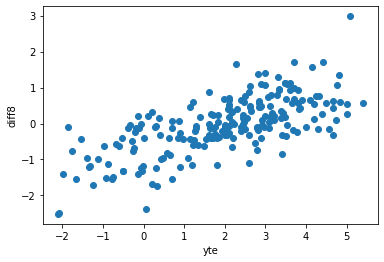

In [36]:
# GRAFICO : RESIDUI ORDINARI modello a 8 vs yte
plt.xlabel("yte")
plt.ylabel("diff8")
plt.scatter( yte, diff8)
plt.show()

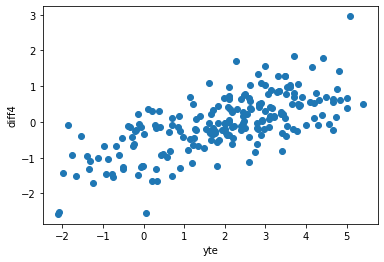

In [37]:
# GRAFICO : RESIDUI ORDINARI modello a 4 vs yte
plt.xlabel("yte")
plt.ylabel("diff4")
plt.scatter( yte, diff4)
plt.show()

In [38]:
Y_pred8_tot = pls_8.predict(X)
Y_pred4_tot = pls_4.predict(X)

diff8_tot = []
diff4_tot = []
for idx,val in enumerate (Y) :
    diff8_tot.append(val-Y_pred8_tot[idx])
    diff4_tot.append(val-Y_pred4_tot[idx])
    print("%10.7f %10.7f %10.7f %10.7f %10.7f"%(\
                                val, Y_pred8_tot[idx], diff8_tot[-1], \
                            Y_pred4_tot[idx], diff4_tot[-1]))
    
    

-0.9600000 -0.9733266  0.0133266 -0.9894848  0.0294848
-0.9200000 -0.9050471 -0.0149529 -0.8049112 -0.1150888
-0.9000000 -0.8838401 -0.0161599 -0.9270610  0.0270610
-0.8300000 -0.8562843  0.0262843 -0.8217552 -0.0082448
-0.8200000 -0.8269745  0.0069745 -0.7242950 -0.0957050
-0.7900000 -0.8095402  0.0195402 -0.8041190  0.0141190
-0.7800000 -0.7525819 -0.0274181 -0.5931702 -0.1868298
-0.7700000 -0.7649628 -0.0050372 -0.4893533 -0.2806467
-0.7700000 -0.7764300  0.0064300 -0.7531213 -0.0168787
-0.7700000 -0.7636912 -0.0063088 -0.6606389 -0.1093611
-0.7500000 -0.7112882 -0.0387118 -0.4221365 -0.3278635
-0.7500000 -0.7253032 -0.0246968 -0.7782517  0.0282517
-0.7400000  0.7472426 -1.4872426  0.8060509 -1.5460509
-0.7300000 -0.7200270 -0.0099730 -0.5984222 -0.1315778
-0.7300000 -0.7546620  0.0246620 -0.7027689 -0.0272311
-0.7000000 -0.6865879 -0.0134121 -0.5715161 -0.1284839
-0.6800000 -0.0977943 -0.5822057  0.0043230 -0.6843230
-0.6700000 -0.6884134  0.0184134 -0.5124053 -0.1575947
-0.6600000

 4.3300000  3.5677101  0.7622899  3.7232311  0.6067689
 1.9100000  1.9218253 -0.0118253  1.9031194  0.0068806
 3.2000000  3.2052050 -0.0052050  3.0754820  0.1245180
-0.0600000  1.1671602 -1.2271602  1.2038775 -1.2638775
 1.5000000  1.5054636 -0.0054636  1.4410572  0.0589428
 0.5200000  0.5139336  0.0060664  0.6441645 -0.1241645
 1.3300000  1.9286049 -0.5986049  1.9961318 -0.6661318
 5.2500000  5.2669727 -0.0169727  5.2808838 -0.0308838
-0.2700000  0.5072226 -0.7772226  0.3946860 -0.6646860
-0.6200000 -0.6358049  0.0158049 -0.8000441  0.1800441
-0.9900000 -1.0018931  0.0118931 -0.6908744 -0.2991256
-0.5400000 -0.5112456 -0.0287544 -0.7394251  0.1994251
 2.5900000  2.5844756  0.0055244  2.5785368  0.0114632
 3.4800000  2.3511025  1.1288975  2.2057559  1.2742441
 1.8900000  1.8797696  0.0102304  1.6744651  0.2155349
 2.2200000  2.2218423 -0.0018423  2.3597460 -0.1397460
-0.2300000  0.4377107 -0.6677107  0.3762200 -0.6062200
-0.1900000 -0.2325169  0.0425169 -0.4773044  0.2873044
 0.0000000

In [39]:
print(len(Y_pred8_tot))

1078


   1 2.18358883 0.37592611
   2 1.82539091 0.47829977
   3 1.62697514 0.53500738
   4 1.47958732 0.57713110
   5 1.48435103 0.57576962
   6 1.47966953 0.57710760
   7 1.48525444 0.57551142
   8 1.48819659 0.57467055
   9 1.48914512 0.57439946
  10 1.48871050 0.57452368
  11 1.48880358 0.57449707
  12 1.48846032 0.57459518
  13 1.48845975 0.57459534
  14 1.48872084 0.57452072
  15 1.48870126 0.57452632
  16 1.48867686 0.57453329
  17 1.48868491 0.57453099
  18 1.48869142 0.57452913
  19 1.48869847 0.57452711
Suggested number of components tr:  4


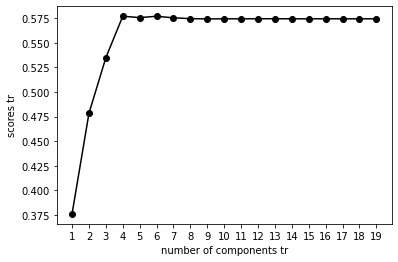

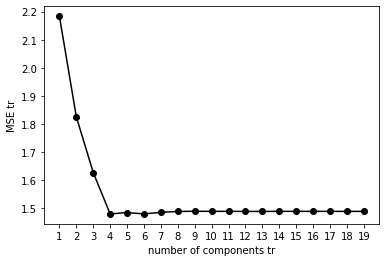

In [40]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

trscores = []
trmses = []
trcomps = []
for trcomp in range(1,20):
    pls = PLSRegression(trcomp)
    pls.fit(xtr, ytr)
    
    y_cv = cross_val_predict(pls, xtr, ytr, cv=5)
    
    trscore = r2_score(ytr, y_cv)
    trmse = mean_squared_error(ytr, y_cv)
    
    trscores.append(trscore)
    trmses.append(trmse)
    trcomps.append(trcomp)
    print("%4d %10.8f %10.8f"%(trcomp, trmse, trscore))
    
msetrmin = np.argmin(trmses)
print("Suggested number of components tr: ", msetrmin+1)
    
plt.plot(trcomps, trscores, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('scores tr')
plt.xticks(trcomps)
plt.show()

plt.plot(trcomps, trmses, '-o', color='black')
plt.xlabel('number of components tr')
plt.ylabel('MSE tr')
plt.xticks(trcomps)
plt.show()


In [41]:
trncomp_cv5 = 4
pls_4_cv5 = PLSRegression(trncomp_cv5)
pls_4_cv5.fit(xtr, ytr)
y4_cv5 = cross_val_predict(pls_4_cv5, xtr, ytr, cv=5 )

mse4_cv5 = mean_squared_error(ytr, y4_cv5)
score4_cv5 = r2_score(ytr, y4_cv5)
print("comp: %4d MSE: %10.8f score: %10.8f"%(trncomp_cv5, mse4_cv5, score4_cv5))

comp:    4 MSE: 1.47958732 score: 0.57713110


-0.7400000  0.8060509 -1.5460509
-0.6800000  0.0043230 -0.6843230
-0.5000000  0.8019107 -1.3019107
-0.3900000 -0.2709288 -0.1190712
-0.3400000 -0.1951396 -0.1448604
-0.2100000  0.0336311 -0.2436311
-0.1900000  0.0450882 -0.2350882
-0.1300000  1.3669495 -1.4969495
-0.0400000  1.1885111 -1.2285111
 0.0500000  2.5826170 -2.5326170
 0.2000000  1.8491412 -1.6491412
 0.2100000 -0.0953531  0.3053531
 0.3000000  0.4816353 -0.1816353
 0.4000000  0.5382043 -0.1382043
 0.6400000  1.4494391 -0.8094391
 0.6930000  0.7654404 -0.0724404
 0.9800000  1.4104977 -0.4304977
 1.1000000  1.8734904 -0.7734904
 1.1400000  1.6290000 -0.4890000
 1.2000000  2.3442791 -1.1442791
 1.2200000  0.7292468  0.4907532
 1.2600000  1.4619333 -0.2019333
-1.9900000 -0.5605372 -1.4294628
 1.3000000  1.5280225 -0.2280225
 1.3000000  1.2075240  0.0924760
 1.5000000  2.2364128 -0.7364128
 1.6700000  1.9112431 -0.2412431
 1.6000000  1.6401711 -0.0401711
 1.6000000  0.4967419  1.1032581
 1.6400000  1.9515137 -0.3115137
 1.7000000

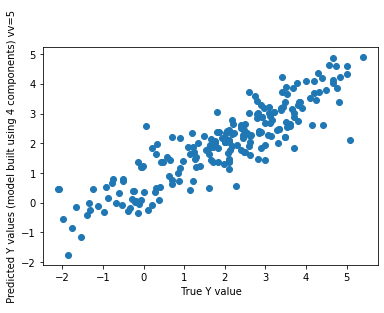

In [42]:
Y_pred4_cv5 = pls_4_cv5.predict(xte)


mse_pred4_cv5 = mean_squared_error(yte, Y_pred4_cv5 )

score_pred4_cv5 = r2_score(yte, Y_pred4_cv5)

diff4_cv5 = []


for idx, val in enumerate(yte):
    diff4_cv5.append(val-Y_pred4_cv5[idx])
    print("%10.7f %10.7f %10.7f"%(\
                                val,  \
                            Y_pred4_cv5[idx], diff4_cv5[-1]))
    

print("MSE 4 comp cv5 : ", mse_pred4_cv5)

print("score 4 comp cv5 :", score_pred4_cv5)



plt.xlabel(" True Y value")
plt.ylabel(" Predicted Y values (model built using 4 components) vv=5 ")

plt.scatter(yte, Y_pred4_cv5)

plt.show()


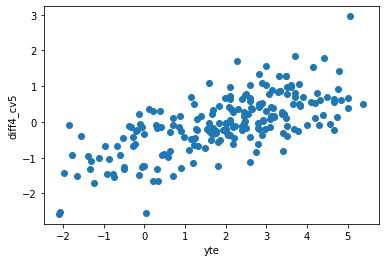

In [43]:
# GRAFICO : RESIDUI ORDINARI modello a 4 vs yte
plt.xlabel("yte")
plt.ylabel("diff4_cv5")
plt.scatter( yte, diff4_cv5)
plt.show()

In [44]:
Y_pred4_tot_cv5 = pls_4_cv5.predict(X)


diff4_tot_cv5 = []
for idx,val in enumerate (Y) :
    diff4_tot_cv5.append(val-Y_pred4_tot_cv5[idx])
    print("%10.7f %10.7f %10.7f"%(\
                                val,  \
                            Y_pred4_tot_cv5[idx], diff4_tot_cv5[-1]))

-0.9600000 -0.9894848  0.0294848
-0.9200000 -0.8049112 -0.1150888
-0.9000000 -0.9270610  0.0270610
-0.8300000 -0.8217552 -0.0082448
-0.8200000 -0.7242950 -0.0957050
-0.7900000 -0.8041190  0.0141190
-0.7800000 -0.5931702 -0.1868298
-0.7700000 -0.4893533 -0.2806467
-0.7700000 -0.7531213 -0.0168787
-0.7700000 -0.6606389 -0.1093611
-0.7500000 -0.4221365 -0.3278635
-0.7500000 -0.7782517  0.0282517
-0.7400000  0.8060509 -1.5460509
-0.7300000 -0.5984222 -0.1315778
-0.7300000 -0.7027689 -0.0272311
-0.7000000 -0.5715161 -0.1284839
-0.6800000  0.0043230 -0.6843230
-0.6700000 -0.5124053 -0.1575947
-0.6600000 -0.6627579  0.0027579
-0.6400000 -0.5305431 -0.1094569
-0.5700000 -0.2776614 -0.2923386
-0.5500000 -0.4114913 -0.1385087
-0.5200000 -0.6394093  0.1194093
-0.5100000 -0.2650761 -0.2449239
-0.5000000  0.8019107 -1.3019107
-0.5000000 -0.6071428  0.1071428
-0.3900000 -0.3263366 -0.0636634
-0.4800000 -0.6389226  0.1589226
-0.4700000 -0.3896009 -0.0803991
-0.4600000 -0.4359177 -0.0240823
-0.4300000

In [45]:
for idx, val in enumerate (Y):
    print("%10.7f %10.7f %10.7f %10.7f %10.7f %10.7f %10.7f"%(\
                                val, Y_pred8_tot[idx], diff8_tot[-1], \
                            Y_pred4_tot[idx], diff4_tot[-1], Y_pred4_tot_cv5[idx], diff4_tot_cv5[-1]))
    # ERRORE IN TABELLA SOTTOSTANTE ( 2 colonne con medesimi valori)

-0.9600000 -0.9733266  0.0107474 -0.9894848  0.1535168 -0.9894848  0.1535168
-0.9200000 -0.9050471  0.0107474 -0.8049112  0.1535168 -0.8049112  0.1535168
-0.9000000 -0.8838401  0.0107474 -0.9270610  0.1535168 -0.9270610  0.1535168
-0.8300000 -0.8562843  0.0107474 -0.8217552  0.1535168 -0.8217552  0.1535168
-0.8200000 -0.8269745  0.0107474 -0.7242950  0.1535168 -0.7242950  0.1535168
-0.7900000 -0.8095402  0.0107474 -0.8041190  0.1535168 -0.8041190  0.1535168
-0.7800000 -0.7525819  0.0107474 -0.5931702  0.1535168 -0.5931702  0.1535168
-0.7700000 -0.7649628  0.0107474 -0.4893533  0.1535168 -0.4893533  0.1535168
-0.7700000 -0.7764300  0.0107474 -0.7531213  0.1535168 -0.7531213  0.1535168
-0.7700000 -0.7636912  0.0107474 -0.6606389  0.1535168 -0.6606389  0.1535168
-0.7500000 -0.7112882  0.0107474 -0.4221365  0.1535168 -0.4221365  0.1535168
-0.7500000 -0.7253032  0.0107474 -0.7782517  0.1535168 -0.7782517  0.1535168
-0.7400000  0.7472426  0.0107474  0.8060509  0.1535168  0.8060509  0.1535168

 1.1000000  1.1006686  0.0107474  0.8409121  0.1535168  0.8409121  0.1535168
 1.1000000  1.1401725  0.0107474  1.3556275  0.1535168  1.3556275  0.1535168
 1.1000000  1.0607737  0.0107474  1.2290100  0.1535168  1.2290100  0.1535168
 1.1200000  1.1079490  0.0107474  1.1737919  0.1535168  1.1737919  0.1535168
 1.1400000  1.5621349  0.0107474  1.6290000  0.1535168  1.6290000  0.1535168
 1.1400000  1.1482155  0.0107474  1.0240040  0.1535168  1.0240040  0.1535168
 1.1500000  1.1416178  0.0107474  1.3306491  0.1535168  1.3306491  0.1535168
 1.1700000  1.2157216  0.0107474  1.1238184  0.1535168  1.1238184  0.1535168
 1.1800000  1.1356584  0.0107474  0.9098892  0.1535168  0.9098892  0.1535168
 1.2000000  1.1633252  0.0107474  0.9012624  0.1535168  0.9012624  0.1535168
 1.2000000  1.2334489  0.0107474  1.0646494  0.1535168  1.0646494  0.1535168
 1.2000000  2.3641651  0.0107474  2.3442791  0.1535168  2.3442791  0.1535168
 1.2000000  1.2076779  0.0107474  1.0697066  0.1535168  1.0697066  0.1535168

In [46]:
import pandas as pd
file = './data/descriptors_titolato.csv'
desc_out13 = pd.read_csv(file)
desc_out_dataframe = pd.DataFrame(desc_out13)
desc_out_dataframe
desc_out_dataframe.columns

Index(['UNIQUEID', ' SMILE', ' SETID', ' DESCRIPTOR', ' LOGD'], dtype='object')

In [47]:
desc_finale = desc_out_dataframe[['UNIQUEID', ' SMILE', ' SETID']]
desc_finale

,UNIQUEID,SMILE,SETID
0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr
1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr
2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr
3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr
4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr
...,...,...,...
1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr
1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC...,Tr
1088,O-94,O1c2c(C=CC1=O)cccc2,Tr
1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te


In [48]:
#1
desc_finale = desc_finale[desc_finale['UNIQUEID'] != 'A-logD7.4-131 ']
print(desc_finale.shape)
#2
desc_finale = desc_finale[desc_finale['UNIQUEID'] != 'A-logD7.4-148 ']
print(desc_finale.shape)
#3
desc_finale = desc_finale[desc_finale['UNIQUEID'] != 'A-logD7.4-192 ']
print(desc_finale.shape)
#4
desc_finale = desc_finale[desc_finale['UNIQUEID'] != 'A-logD7.4-251 ']
print(desc_finale.shape)
#5
desc_finale = desc_finale[desc_finale['UNIQUEID'] != 'A-logD7.4-313 ']
print(desc_finale.shape)
#6
desc_finale = desc_finale[desc_finale['UNIQUEID'] != 'A-logD7.4-318 ']
print(desc_finale.shape)
#7
desc_finale = desc_finale[desc_finale['UNIQUEID'] != 'A-logD7.4-319 ']
print(desc_finale.shape)
#8
desc_finale = desc_finale[desc_finale['UNIQUEID'] != 'A-logD7.4-327 ']
print(desc_finale.shape)
#9
desc_finale = desc_finale[desc_finale['UNIQUEID'] != 'A-logD7.4-331 ']
print(desc_finale.shape)
#10
desc_finale = desc_finale[desc_finale['UNIQUEID'] != 'A-logD7.4-558 ']
print(desc_finale.shape)
#11
desc_finale = desc_finale[desc_finale['UNIQUEID'] != 'O-174 ']
print(desc_finale.shape)
#12
desc_finale = desc_finale[desc_finale['UNIQUEID'] != 'O-175 ']
print(desc_finale.shape)
#13
desc_finale = desc_finale[desc_finale['UNIQUEID'] != 'O-177 ']
print(desc_finale.shape)



(1090, 3)
(1089, 3)
(1088, 3)
(1087, 3)
(1086, 3)
(1085, 3)
(1084, 3)
(1083, 3)
(1082, 3)
(1081, 3)
(1080, 3)
(1079, 3)
(1078, 3)


In [49]:
desc_finale

,UNIQUEID,SMILE,SETID
0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr
1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr
2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr
3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr
4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr
...,...,...,...
1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr
1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC...,Tr
1088,O-94,O1c2c(C=CC1=O)cccc2,Tr
1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te


In [50]:
desc_finale['LogD exp'] = Y
desc_finale

,UNIQUEID,SMILE,SETID,LogD exp
0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,-0.960
1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,-0.920
2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,-0.900
3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,-0.830
4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,-0.820
...,...,...,...,...
1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1.000
1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC...,Tr,1.140
1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1.415
1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1.670


In [51]:
desc_finale['Y_pred8_tot'] = Y_pred8_tot
desc_finale

,UNIQUEID,SMILE,SETID,LogD exp,Y_pred8_tot
0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,-0.960,-0.973327
1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,-0.920,-0.905047
2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,-0.900,-0.883840
3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,-0.830,-0.856284
4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,-0.820,-0.826975
...,...,...,...,...,...
1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1.000,1.037805
1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC...,Tr,1.140,1.103721
1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1.415,1.414670
1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1.670,1.418279


In [52]:
desc_finale['Y_pred4_tot']= Y_pred4_tot
desc_finale

,UNIQUEID,SMILE,SETID,LogD exp,Y_pred8_tot,Y_pred4_tot
0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,-0.960,-0.973327,-0.989485
1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,-0.920,-0.905047,-0.804911
2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,-0.900,-0.883840,-0.927061
3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,-0.830,-0.856284,-0.821755
4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,-0.820,-0.826975,-0.724295
...,...,...,...,...,...,...
1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1.000,1.037805,0.596280
1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC...,Tr,1.140,1.103721,1.063645
1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1.415,1.414670,1.321962
1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1.670,1.418279,1.434113


In [53]:
desc_finale['Y_pred4_tot_cv5'] = Y_pred4_tot_cv5
desc_finale

,UNIQUEID,SMILE,SETID,LogD exp,Y_pred8_tot,Y_pred4_tot,Y_pred4_tot_cv5
0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,-0.960,-0.973327,-0.989485,-0.989485
1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,-0.920,-0.905047,-0.804911,-0.804911
2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,-0.900,-0.883840,-0.927061,-0.927061
3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,-0.830,-0.856284,-0.821755,-0.821755
4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,-0.820,-0.826975,-0.724295,-0.724295
...,...,...,...,...,...,...,...
1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1.000,1.037805,0.596280,0.596280
1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC...,Tr,1.140,1.103721,1.063645,1.063645
1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1.415,1.414670,1.321962,1.321962
1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1.670,1.418279,1.434113,1.434113


In [54]:
desc_finale.to_excel("desc_finale_outdiff.xlsx")